In [1]:
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from LatticeData import *

In [2]:
analyzer = LatticeData(datadir = "/data_smith/")

In [3]:
analyzer.copy_data_from_directory("run_2023_09_26")

In [4]:
params = analyzer.all_params()

In [5]:
params.head()

,freq,nMC,ntherm,itheta,beta,length,itheta/pi
0,100.0,10000.0,4000.0,1.178097,1.6,10.0,0.375
1,100.0,10000.0,4000.0,1.963495,1.6,10.0,0.625
2,100.0,10000.0,4000.0,0.785398,1.6,10.0,0.250
3,100.0,10000.0,4000.0,0.392699,1.6,40.0,0.125
4,100.0,10000.0,4000.0,2.356194,1.6,40.0,0.750


In [6]:
param_dict = {"length": 10, "freq": 100, "itheta":2.356194, "beta":1.6, "nMC":10000, "ntherm": 4000}
one_run = analyzer.get_data(single_run = True, suppress_output = False, **param_dict)

freq 100
nMC 10000
ntherm 4000
itheta 2.356194
beta 1.6
length 10


In [7]:
one_run.head()

,step,|phi|,Q_L,A_L,S_L,Xi_L,F_LRe,F_LIm,acc,dt,...,Q_L_ta,A_L_ta,S_L_ta,Xi_L_ta,corr_length_Re,corr_length_Im,F_Re_py,F_Im_py,mass_gap_Re,mass_gap_Im
0,0,100.0,-0.000000,-201.967438,-201.967438,0.496030,0.008225,0.011924,0.220000,0.0,...,1,6,6,1,2.387691,-0.558664,0.193545,0.095815,0.397077,0.092907
1,100,100.0,-0.091002,-202.060680,-201.846260,2.610412,0.008225,0.011924,0.190990,0.0,...,1,6,6,1,5.477453,-1.281596,0.193545,0.095815,0.173091,0.040499
2,200,100.0,-0.000000,-210.398559,-210.398559,2.829112,0.008225,0.011924,0.198756,0.0,...,1,6,6,1,5.702289,-1.334203,0.193545,0.095815,0.166266,0.038902
3,300,100.0,-0.000000,-210.096003,-210.096003,2.965907,0.008225,0.011924,0.206844,0.0,...,1,6,6,1,5.838522,-1.366078,0.193545,0.095815,0.162386,0.037995
4,400,100.0,1.689967,-189.540672,-193.522563,3.043159,0.008225,0.011924,0.208479,1.0,...,1,6,6,1,5.914070,-1.383755,0.193545,0.095815,0.160312,0.037509


In [8]:
param_dict = {"length": 10, "freq": 100, "itheta":2.356194, "beta":1.6, "nMC":10000}
one_run = analyzer.get_data(single_run = True, suppress_output = False, **param_dict)

Missing parameters in input: 
['ntherm']


In [9]:
param_dict = {"length": 10, "itheta":2.356194}
filtered_data = analyzer.get_data(single_run = False, suppress_output = True, **param_dict)

In [10]:
filtered_data.head()

,step,|phi|,Q_L,A_L,S_L,Xi_L,F_LRe,F_LIm,acc,dt,...,Q_L_ta,A_L_ta,S_L_ta,Xi_L_ta,corr_length_Re,corr_length_Im,F_Re_py,F_Im_py,mass_gap_Re,mass_gap_Im
0,0,100.0,-0.000000,-201.967438,-201.967438,0.496030,0.008225,0.011924,0.220000,0.0,...,1,6,6,1,2.387691,-0.558664,0.193545,0.095815,0.397077,0.092907
1,100,100.0,-0.091002,-202.060680,-201.846260,2.610412,0.008225,0.011924,0.190990,0.0,...,1,6,6,1,5.477453,-1.281596,0.193545,0.095815,0.173091,0.040499
2,200,100.0,-0.000000,-210.398559,-210.398559,2.829112,0.008225,0.011924,0.198756,0.0,...,1,6,6,1,5.702289,-1.334203,0.193545,0.095815,0.166266,0.038902
3,300,100.0,-0.000000,-210.096003,-210.096003,2.965907,0.008225,0.011924,0.206844,0.0,...,1,6,6,1,5.838522,-1.366078,0.193545,0.095815,0.162386,0.037995
4,400,100.0,1.689967,-189.540672,-193.522563,3.043159,0.008225,0.011924,0.208479,1.0,...,1,6,6,1,5.914070,-1.383755,0.193545,0.095815,0.160312,0.037509


In [11]:
all_data = analyzer.get_data(single_run = False, suppress_output = True)

In [12]:
df_stats = analyzer.do_stats(stack = False)

10.0
40.0


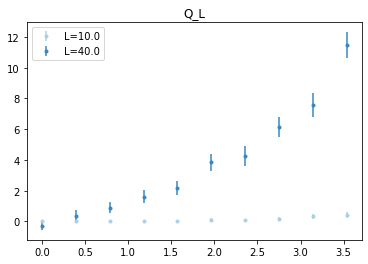

In [13]:
params = analyzer.all_params()
lengths = sorted(params["length"].unique())
colors = sns.color_palette("Blues", len(lengths))
observable = "Q_L"

for n,length in enumerate(lengths):
    print(length)
    x,y,err = analyzer.get_plot_data(obs = observable, L = length, beta = 1.6, nMC = 10000, 
                                     ntherm = 4000, freq = 100)
    plt.errorbar(x, y , yerr = err, marker = ".", ls = "none", color = colors[n], label ="L="+str(length))
plt.legend()
plt.title(observable)
#plt.savefig("../Figs_README/QL_v_itheta_example.jpg", format = "jpg")
plt.show()

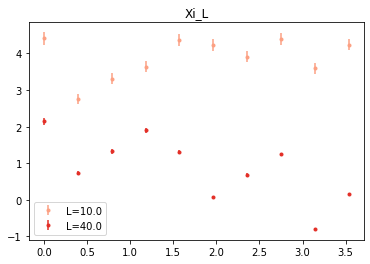

In [14]:
params = analyzer.all_params()
lengths = params["length"].unique()
colors = sns.color_palette("Reds", len(lengths))
observable = "Xi_L"

for n,length in enumerate(lengths):
    x,y,err = analyzer.get_plot_data(obs = observable, L = length, beta = 1.6, nMC = 10000, 
                                     ntherm = 4000, freq = 100)
    plt.errorbar(x, y , yerr = err, marker = ".", ls = "none", color = colors[n], label ="L="+str(length))
plt.legend()
plt.title(observable)
plt.savefig("../Figs_README/XiL_v_itheta_example.jpg", format = "jpg")
plt.show()

In [15]:
itheta = np.pi
beta = 1.6
length = 10
nMC = 10000
ntherm = 4000
freq = 100
corr_params = {"itheta": itheta, "beta": beta,"length": length,"nMC": nMC, "ntherm": ntherm, "freq": freq }
G_ij = analyzer.get_corr_func(suppress_output = False, **corr_params)

freq 100
nMC 10000
ntherm 4000
itheta 3.141593
beta 1.6
length 10


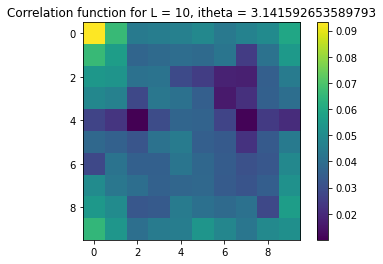

In [16]:
plt.imshow(G_ij, cmap = "viridis", aspect='equal')
plt.colorbar()
plt.title("Correlation function for L = "+str(corr_params["length"])+", itheta = "+str(corr_params["itheta"]))
plt.savefig("../Figs_README/Gij_example.jpg", format = "jpg")
plt.show()

In [17]:
analyzer.calc_F(**corr_params)

(0.3764068166757886-0.04453111253134049j)

In [18]:
df_stats.columns

Index(['length', 'itheta', 'beta', 'nMC', 'ntherm', 'freq', '|phi|_mean',
       'Q_L_mean', 'A_L_mean', 'S_L_mean', 'Xi_L_mean', 'F_LRe_mean',
       'F_LIm_mean', 'acc_mean', 'Q_L_ta', 'A_L_ta', 'S_L_ta', 'Xi_L_ta',
       'corr_length_Re_mean', 'corr_length_Im_mean', 'F_Re_py_mean',
       'F_Im_py_mean', 'mass_gap_Re_mean', 'mass_gap_Im_mean', '|phi|_std',
       'Q_L_std', 'A_L_std', 'S_L_std', 'Xi_L_std', 'F_LRe_std', 'F_LIm_std',
       'acc_std', 'corr_length_Re_std', 'corr_length_Im_std', 'F_Re_py_std',
       'F_Im_py_std', 'mass_gap_Re_std', 'mass_gap_Im_std', 'time (sec)',
       'time (min)', 'time (hr)'],
      dtype='object')

In [19]:
df_F = df_stats[['length', 'itheta', 'beta', 'nMC', 'ntherm', 'freq', 'F_LRe_mean',
       'F_LIm_mean','F_Re_py_mean','F_Im_py_mean','F_LRe_std', 'F_LIm_std', 'F_Re_py_std',
       'F_Im_py_std']].copy()
df_F = df_F[df_F["length"]==10]

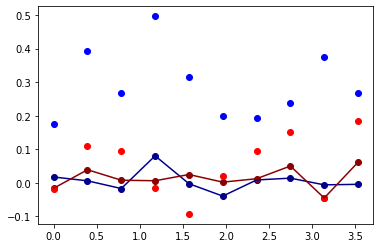

In [20]:
itheta = df_F["itheta"].unique()
plt.scatter(x = itheta,y = df_F["F_LRe_mean"], color = "darkblue")
plt.errorbar(x = itheta,y = df_F["F_LRe_mean"],yerr = df_F["F_LRe_std"], color = "darkblue")
plt.scatter(x = itheta,y = df_F["F_LIm_mean"], color = "darkred")
plt.errorbar(x = itheta,y = df_F["F_LIm_mean"], yerr = df_F["F_LIm_std"], color = "darkred")
plt.scatter(x = itheta,y = df_F["F_Re_py_mean"], color = "blue")
plt.scatter(x = itheta,y = df_F["F_Im_py_mean"], color = "red")
plt.show()

In [21]:
df_F.head()

,length,itheta,beta,nMC,ntherm,freq,F_LRe_mean,F_LIm_mean,F_Re_py_mean,F_Im_py_mean,F_LRe_std,F_LIm_std,F_Re_py_std,F_Im_py_std
0,10.0,0.000000,1.6,10000.0,4000.0,100.0,0.017027,-0.016494,0.174824,-0.018091,0.0,0.0,0.0,0.0
1,10.0,0.392699,1.6,10000.0,4000.0,100.0,0.005677,0.038717,0.392708,0.110771,0.0,0.0,0.0,0.0
2,10.0,0.785398,1.6,10000.0,4000.0,100.0,-0.017346,0.007532,0.268991,0.095759,0.0,0.0,0.0,0.0
3,10.0,1.178097,1.6,10000.0,4000.0,100.0,0.080226,0.005893,0.496576,-0.016936,0.0,0.0,0.0,0.0
4,10.0,1.570796,1.6,10000.0,4000.0,100.0,-0.002927,0.024464,0.314564,-0.093049,0.0,0.0,0.0,0.0
